# Exploring 20 news group dataset with Text Analysis

In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.corpus import names

In [4]:
print(names.words()[:10])

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


In [5]:
print(len(names.words()))

7944


In [7]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
porter_stemmer.stem('machines')

'machin'

In [8]:
porter_stemmer.stem('learning')

'learn'

In [9]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [10]:
lemmatizer.lemmatize('machines')

'machine'

In [11]:
lemmatizer.lemmatize('learning')

'learning'

In [12]:
from sklearn.datasets import fetch_20newsgroups

In [13]:
groups = fetch_20newsgroups()

In [14]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [15]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [16]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

In [17]:
import numpy as np

In [18]:
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [19]:
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [21]:
for i in range(10):
    print('Length of ' + str((i+1)) + 'is ' + str(len(groups.data[i])))

Length of 1is 721
Length of 2is 858
Length of 3is 1981
Length of 4is 815
Length of 5is 1120
Length of 6is 2602
Length of 7is 583
Length of 8is 2834
Length of 9is 318
Length of 10is 1550


In [22]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt

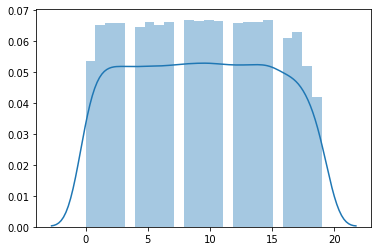

In [24]:
sns.distplot(groups.target)
plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
def letters_only(astr):
    return astr.isalpha()

In [31]:
cv = CountVectorizer(stop_words = 'english', max_features = 500)
cleaned = []
all_names = set(names.words())

for post in groups.data:
    cleaned.append(' '.join([lemmatizer.lemmatize(word.lower()) for word in post.split() if letters_only(word) and word not in all_names]))

In [32]:
transformed = cv.fit_transform(cleaned)
print(cv.get_feature_names())

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'arab', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'atheist', 'attack', 'attempt', 'available', 'away', 'bad', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'code', 'college', 'color', 'come', 'coming', 'command', 'comment', 'common', 'communication', 'company', 'computer', 'computing', 'consider', 'considered', 'contact', 'control', 'controller', 'copy', 'correct', 'cost', 'country', 'couple', 'course', 'cover', 'create'

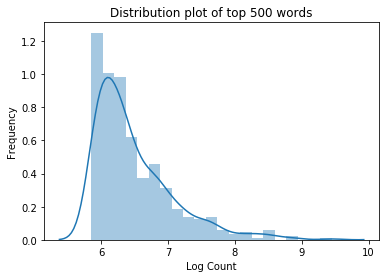

In [33]:
sns.distplot(np.log(transformed.toarray().sum(axis=0)))
plt.xlabel('Log Count')
plt.ylabel('Frequency')
plt.title('Distribution plot of top 500 words')
plt.show()

In [34]:
from sklearn.cluster import KMeans

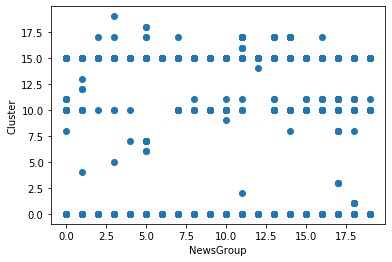

In [36]:
km = KMeans(n_clusters = 20)
km.fit(transformed)
labels = groups.target
plt.scatter(labels, km.labels_)
plt.xlabel('NewsGroup')
plt.ylabel('Cluster')
plt.show()

## Top 100 topics using Topic Modelling

In [37]:
from sklearn.decomposition import NMF

In [38]:
nmf = NMF(n_components = 100, random_state = 43).fit(transformed)
for topic_idx, topic in enumerate(nmf.components_):
    label = '{} : '.format(topic_idx)
    print( label, ' '.join([cv.get_feature_names()[i] for i in topic.argsort()[:-9:-1]]))

0 :  wa thought later took left order seen taken
1 :  db bit data place stuff add time line
2 :  server using display screen support code mouse application
3 :  file section information write source change entry number
4 :  disk drive hard controller support card board head
5 :  entry rule program source number info email build
6 :  new york sale change service result study early
7 :  image software user package using display include support
8 :  window manager application using offer user information course
9 :  gun united control house american second national issue
10 :  hockey league team game division player list san
11 :  turkish government sent war study came american world
12 :  program change technology display information version application rate
13 :  space nasa technology service national international small communication
14 :  government political federal sure free private local country
15 :  output line open write read return build section
16 :  people country doing tell 